# Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 

- The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 

If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

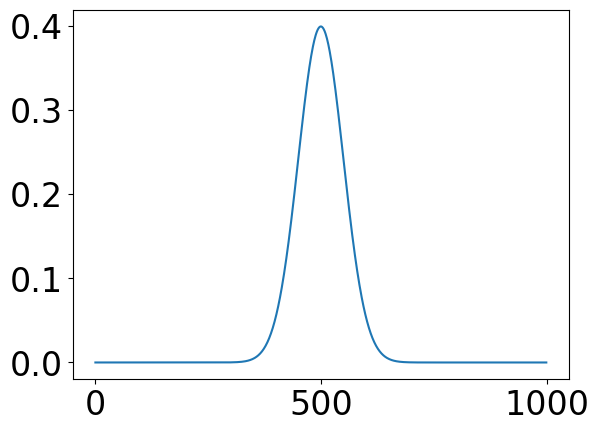

In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

# define normal distribution 
# takes a list of x values in a given range with some number of finite
# divisions, will create a y value that correlates with x value that was
# passed
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000) ):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

normal_dist_list = normal_dist(mean = 0, sd = 1)
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t$\\sigma_0$ = 1\t$\\sigma_1$ = 2\t$\\sigma_2$ = 3\t')

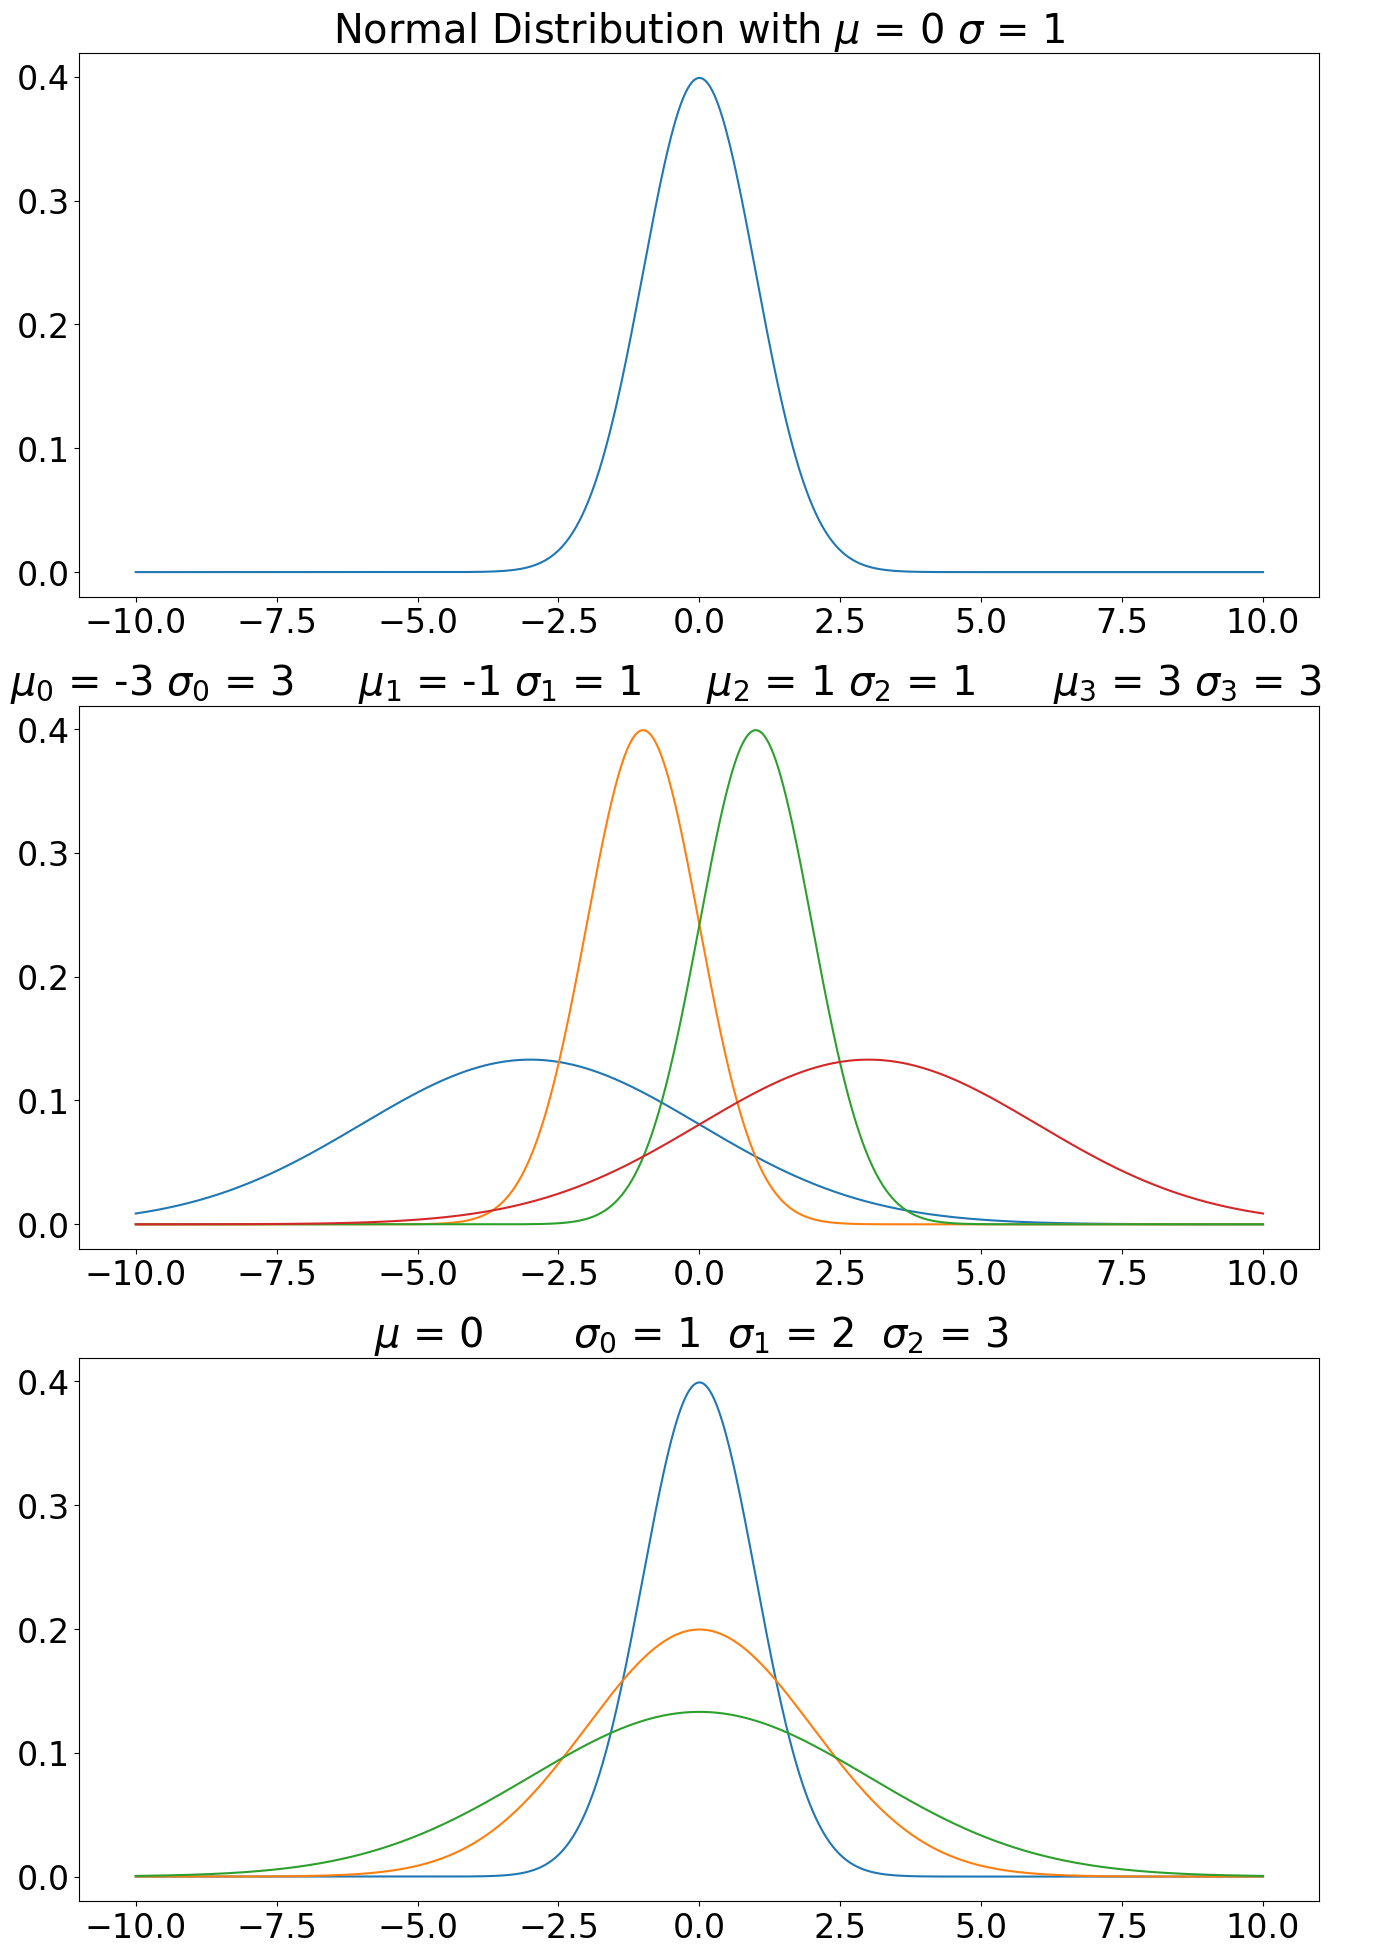

In [36]:
plt.rcParams.update({"font.size":24})
fig, axs = plt.subplots(3,1, figsize = (16,24))
x = np.linspace(-10,10,1000)

# perform transformation
mean_, sd = 0,1
normal_dist_list = normal_dist(mean = mean_, sd = sd, x = x)
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Normal Distribution with $\mu$ = " + \
                 str(mean_) + " $\sigma$ = " + str(sd))

# plot normal curves with varying means 
ax1_title = ""
ax1_sub = 0
for mean_ in range(-3,4, 2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[1].plot(x, normal_dist_list)
    # add titles
    ax1_title = ax1_title + "$\mu_" + str(ax1_sub) + "$ = " + str(mean_) + " "
    ax1_title = ax1_title + "$\sigma_" + str(ax1_sub) + "$ = " + str(sd) + "\t"
    ax1_sub += 1
axs[1].set_title(ax1_title)

# plot normal curves with varying standard deviations 
ax2_title = "$\mu$ = 0\t"
ax2_sub = 0
for sd in range(1,4):
    mean_ = 0
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + "$\sigma_" + str(ax2_sub) + "$ = " + str(sd) + "\t"
    ax2_sub += 1
axs[2].set_title(ax2_title)


## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 
